C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\2363924232.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Spotpris["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(Spotpris), freq="H")
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\2363924232.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  TOTel_df["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(TOTel_df), freq="H")
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\2363924232.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max_effekt = TOTel_df["TOTel"].resample("M").max()  # Högsta värde per månad
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\2363924232.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_E = Spotpris["E"].resample("M").mean()
C:\Users

Summa kostnad i el 2023: 59635886.22332853
Original elförbrukning topptimmar:     Timme  Elförbrukning
0    7962       5576.473
1    7914       5535.385
2    8443       5529.123
3    8442       5527.887
4    7915       5515.957
5    8059       5503.461
6    8395       5489.299
7    7890       5485.139
8    8251       5481.013
9    8467       5435.143
10   7219       5429.050
11   8130       5420.533
12   8274       5411.398
13   8298       5400.864
14   8106       5387.373
15   8466       5385.857
16   8101       5382.537
17   8250       5369.012
18   7435       5356.007
19   8322       5349.361
20   8394       5348.570
21   6761       5340.487
22   7963       5338.747
23   8131       5319.800
24   7290       5318.860
25   8129       5317.858
26   6786       5316.920
27   6518       5314.109
28   7044       5299.480
29   8126       5289.845
Snitt originaltopptimmar: 5405.851600000001

Genomsnittligt dagligt Depth of Discharge (DoD) under året: 16.93%
Snitt = 5404.58
De 30 högsta elförb

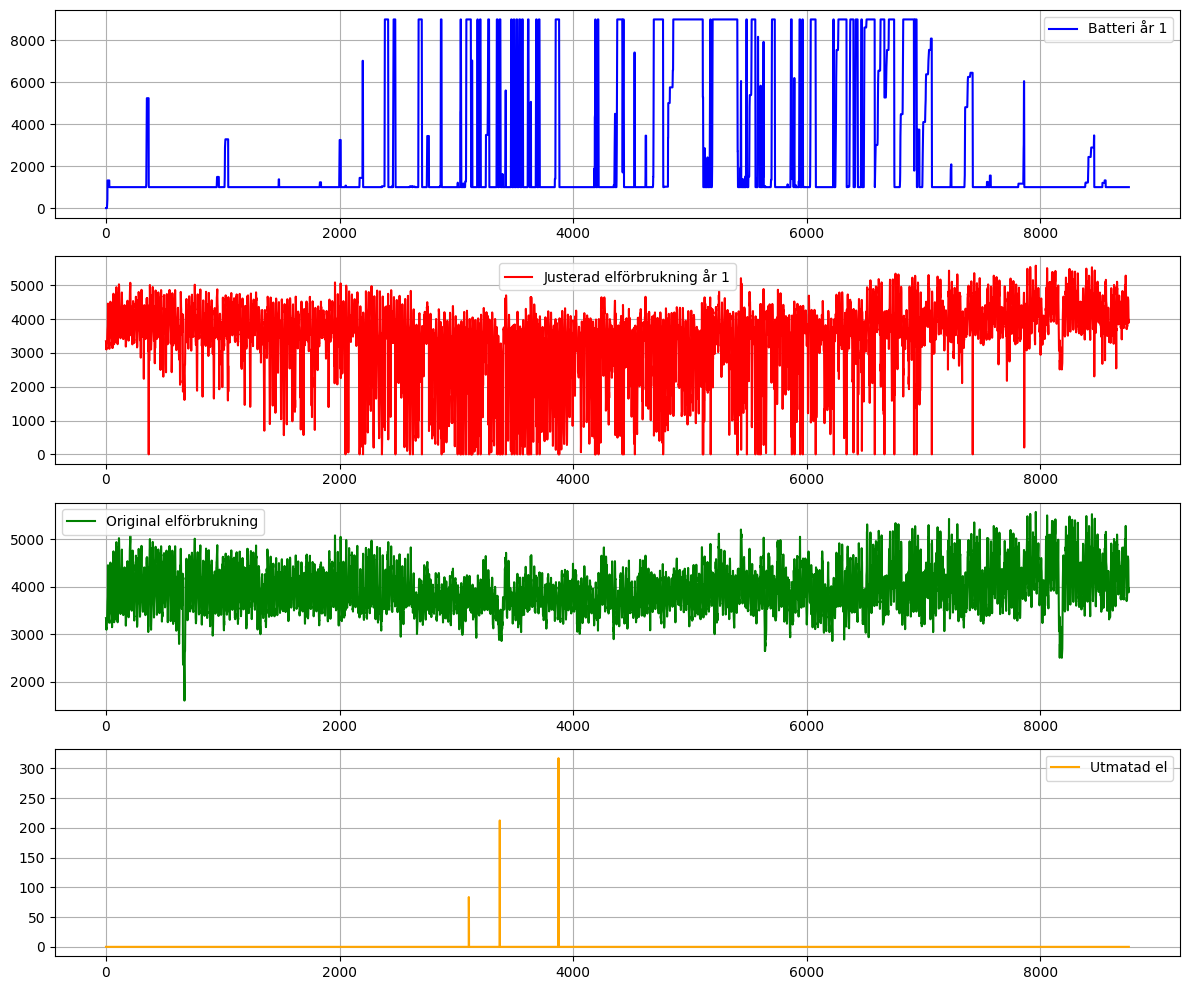

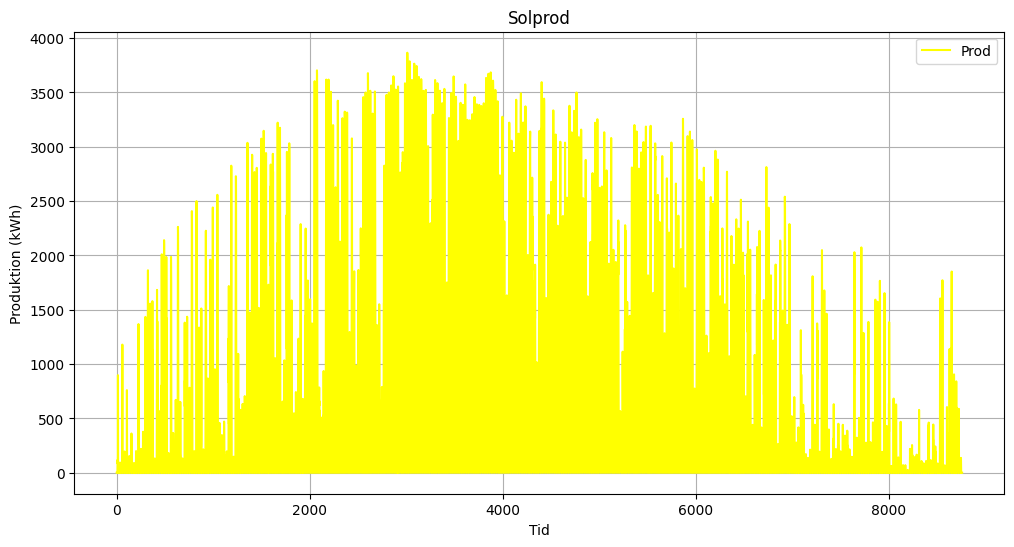

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Läs in Excel-filer
SolprodSödra = pd.read_excel("Soldata-filerSÖDRA/SummaSödraSolPROD.xlsx", header=None)
SödraOmrEL = pd.read_excel("Eldata-filerSÖDRA/SummaSödraOmrådet.xlsx", header=None)

SolprodABK = pd.read_excel("SolprodABK.xlsx", header=None)
ABKEl = pd.read_excel("ABKEL.xlsx", names=["ABKEl"], header=None)
Spotpris = pd.read_excel("Spotpris.xlsx", names=["Spotpris"], header=None)
Vindprod = pd.read_excel("Vindturbin.xlsx", header=None)
StarkaEl = pd.read_excel("Starka2023.xlsx", header=None)
KLTel = pd.read_excel("KLTelFörbr.xlsx", header=None)

NorraEL = StarkaEl.iloc[:, 0] + ABKEl.iloc[:, 0] + KLTel.iloc[:, 0]
SödraEL = SödraOmrEL.iloc[:, 0]
TOTel = NorraEL + SödraEL
Vind = Vindprod.iloc[:, 0]
Sol = 0.5*(SolprodABK.iloc[:, 0] + SolprodSödra.iloc[:, 0]) #VindochSOL = 0.3, SOL = 0.5
Spot = Spotpris.iloc[:, 0]

Prod =  Sol

Prod_list = Prod.tolist()


Spotpris["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(Spotpris), freq="H")
Spotpris.set_index("Tid", inplace=True)

fastNätTOT = 342710

# Lägg till tidsindex för TOTel
TOTel_df = pd.DataFrame({"TOTel": TOTel})
TOTel_df["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(TOTel_df), freq="H")
TOTel_df.set_index("Tid", inplace=True)

# Hitta maximal timmedeleffekt per månad
monthly_max_effekt = TOTel_df["TOTel"].resample("M").max()  # Högsta värde per månad

# Effektavgift (per kW)
effektavgift = 57.04  # kr/kW

# Beräkna effektkostnad per månad
effektkostnad_per_månad = monthly_max_effekt * effektavgift  # Kostnad per månad

# Summera effektkostnaden för hela året
total_effektkostnad = effektkostnad_per_månad.sum()

Spotpris["E"] = 2.23 + 0.0583 * Spotpris["Spotpris"]

# Beräkna genomsnittlig överföringsavgift per månad
monthly_avg_E = Spotpris["E"].resample("M").mean()

# Beräkna totala elförbrukningen per månad
monthly_total_TOTel = TOTel_df["TOTel"].resample("M").sum()

# Beräkna summa överföringsavgift för hela året
summaÖverföringsAvgift = (monthly_avg_E * monthly_total_TOTel).sum()

totElnätskostnad = fastNätTOT + total_effektkostnad + summaÖverföringsAvgift/100

elhandelskostnad = (Spot * TOTel).sum() / 100
energiskatt = (43.9 * TOTel).sum() / 100

summaElKostnad = (totElnätskostnad + elhandelskostnad + energiskatt) * 1.25
print("Summa kostnad i el 2023:", summaElKostnad)

# Ta fram elförbrukning (första kolumnen) som en Pandas Series
elförbrukning = pd.Series(TOTel)

# Sortera elförbrukningen i fallande ordning och hämta de 30 högsta värdena
top_30_hours = elförbrukning.sort_values(ascending=False).head(30)

# Skapa en DataFrame med radnummer (index) och värde (elförbrukning)
top_30_with_index = top_30_hours.reset_index()

# Byt namn på kolumnerna för bättre läsbarhet
top_30_with_index.columns = ['Timme', 'Elförbrukning']

# Skriv ut de 30 timmarna med högst elförbrukning och radnummer
print("Original elförbrukning topptimmar: " + top_30_with_index.to_string())
print("Snitt originaltopptimmar: " + str(top_30_hours.mean()))


# ----------------------- YEAR 1 SIMULATION -----------------------
batteriKapacitet = 0.0  # Start with an empty battery
batteriMaxKapacitet = 10000  # Max battery capacity in kWh
min_battery_level = batteriMaxKapacitet*0.1
max_battery_level = batteriMaxKapacitet * 0.9
maxFrånBatteri = max_battery_level*0.5
faktor = 0.1
original_consumption = TOTel.tolist()
justeradElförbrukning = []  # Adjusted electricity consumption for Year 1
battery_values = []  # Battery energy over time
utmatning = []
köptaTimmar = []

for tid, prod, totEl, spot in zip(Spotpris.index, Prod, TOTel, Spot):  
    diff = totEl - prod  # Skillnad mellan förbrukning och solproduktion

    if diff <= 0:
        # Om solproduktionen är större än förbrukningen, ladda batteriet istället för att spara negativa värden
        batteriKapacitet = min(batteriKapacitet - diff, max_battery_level)  # -diff eftersom diff är negativ
        justeradElförbrukning.append(0)  # Vi behöver inte köpa el
        utmatning.append(max(0,batteriKapacitet - diff - max_battery_level))
        köptaTimmar.append((tid,0))
    else:
        if spot <= 30 and prod > 0:
            if batteriKapacitet + prod >= max_battery_level: 
                prodÖver = (batteriKapacitet + prod) - max_battery_level
                batteriKapacitet = min(batteriKapacitet + prod, max_battery_level)
                köpt_el = max(0, totEl-prodÖver)
                justeradElförbrukning.append(köpt_el)  
                köptaTimmar.append((tid, spot if köpt_el > 0 else 0))
                utmatning.append(0)
            else:
                batteriKapacitet = min(batteriKapacitet + prod, max_battery_level)
                justeradElförbrukning.append(totEl)
                köptaTimmar.append((tid, spot))
                utmatning.append(0)  
        elif 30 < spot < 70 and prod > 0:
            justeradElförbrukning.append(diff)
            köptaTimmar.append((tid, spot))
            utmatning.append(0)
        elif spot >= 70:
            energiFrånBatteri = min(batteriKapacitet, diff, maxFrånBatteri, max(0, batteriKapacitet-min_battery_level))
            batteriKapacitet -= energiFrånBatteri
            köpt_el = max(0, diff - energiFrånBatteri)
            köptaTimmar.append((tid, spot if köpt_el > 0 else 0))
            justeradElförbrukning.append(köpt_el)
            utmatning.append(0)
        else:
            justeradElförbrukning.append(totEl)
            köptaTimmar.append((tid, spot))
            utmatning.append(0)


    battery_values.append(batteriKapacitet)


# Skapa DataFrame med tidsindex och batterinivå
battery_df = pd.DataFrame({
    "Tid": Spotpris.index[:len(battery_values)],
    "Batteri": battery_values
})
battery_df.set_index("Tid", inplace=True)

# Räkna ut daglig max och min batterinivå
daily_max = battery_df["Batteri"].resample("D").max()
daily_min = battery_df["Batteri"].resample("D").min()

# Räkna ut DoD per dag i procent
daily_DoD = (daily_max - daily_min) / batteriMaxKapacitet * 100

# Räkna ut genomsnittligt dagligt DoD
average_DoD = daily_DoD.mean()

print(f"\nGenomsnittligt dagligt Depth of Discharge (DoD) under året: {average_DoD:.2f}%")

# Konvertera elförbrukning till en NumPy-array
elförbrukning_array = np.array(justeradElförbrukning)

# Hitta de 30 högsta värdena i elförbrukning
top_30_indices = np.argsort(elförbrukning_array)[-30:]  # Index för de 30 största värdena

# Hämta de faktiska tidsstämplarna från Spotpris.index
top_30_times = Spotpris.index[top_30_indices]

# Hämta de 30 största elförbrukningsvärdena
top_30_values = elförbrukning_array[top_30_indices]

# Sortera topp 30 i fallande ordning och behåll index
sorted_pairs = sorted(zip(top_30_values, top_30_times) ,reverse=True)

values_only = [value for value, _ in sorted_pairs]
mean_value = sum(values_only) / len(values_only)
print(f"Snitt = {mean_value:.2f}")


# Skriv ut de 30 högsta värdena tillsammans med originaltimmarna
print("De 30 högsta elförbrukningsvärdena och deras timmar i Excel-filen:")
for i, (value, original_time) in enumerate(sorted_pairs):
    excel_rad = i + 8  # +8 för rubrikrad och 1-baserade index, och +1 för att börja från 1
    print(f"{i+1}. Timme {original_time}  - Förbrukning: {value} (Excel rad: {excel_rad})")




köptaTimmar_df = pd.DataFrame(köptaTimmar, columns=["Tid", "Spotpris"])
köptaTimmar_df.set_index("Tid", inplace=True)

köptaTimmar_df["E"] = 2.23 + 0.0583 * köptaTimmar_df["Spotpris"]

monthly_avg_E_köpt = köptaTimmar_df["E"].resample("M").mean()

elförbrukning_df = pd.DataFrame({"Tid": Spotpris.index, "elförbrukning": justeradElförbrukning})
elförbrukning_df.set_index("Tid", inplace=True)

monthly_total_elförbrukning = elförbrukning_df["elförbrukning"].resample("M").sum()

summaJusteradÖverf = (monthly_avg_E_köpt * monthly_total_elförbrukning).sum()

monthly_max_effekt_justerad = elförbrukning_df["elförbrukning"].resample("M").max()  # Högsta värde per månad

# Effektavgift (per kW)
effektavgift = 57.04  # kr/kW

# Beräkna effektkostnad per månad
effektkostnad_per_månad_justerad = monthly_max_effekt_justerad * effektavgift  # Kostnad per månad

total_effektkostnad_justerad = effektkostnad_per_månad_justerad.sum()

summaJusteradÖverfKR = (summaJusteradÖverf / 100) + fastNätTOT + total_effektkostnad_justerad

# Filtrera elförbrukning endast för de köpta timmarna
elförbrukning_köpt = elförbrukning_df.loc[köptaTimmar_df.index]

# Beräkna elhandelskostnaden: Spotpris * elförbrukning
elhandelskostnad_köpt = (köptaTimmar_df["Spotpris"] * elförbrukning_köpt["elförbrukning"]).sum() / 100

# Beräkna den justerade energiskatten
total_elförbrukning = sum(justeradElförbrukning)
JusteradEnergiskatt = (total_elförbrukning * 43.9) / 100


# Beräkna den justerade elkostnaden
summaJusteradElkostnad = 1.25 * (summaJusteradÖverfKR + JusteradEnergiskatt + elhandelskostnad_köpt)
print("Justerad elkostnad simulering:", summaJusteradElkostnad)


# ----------------------- PLOTTING RESULTS -----------------------
fig, ax = plt.subplots(4, 1, figsize=(12, 10))

ax[0].plot(battery_values, label='Batteri år 1', color='blue')
ax[1].plot(justeradElförbrukning, label='Justerad elförbrukning år 1', color='red')
ax[2].plot(original_consumption, label='Original elförbrukning', color='green')
ax[3].plot(utmatning, label='Utmatad el', color='orange')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

# Skapa en figur och plotta
plt.figure(figsize=(12, 6))
plt.plot(Prod_list, label="Prod", color="yellow")

plt.xlabel("Tid")
plt.ylabel("Produktion (kWh)")
plt.title("Solprod")
plt.legend()
plt.grid(True)

# Visa grafen
plt.show()


C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\3346393814.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Spotpris["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(Spotpris), freq="H")
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\3346393814.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  TOTel_df["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(TOTel_df), freq="H")
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\3346393814.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max_effekt = TOTel_df["TOTel"].resample("M").max()  # Högsta värde per månad
C:\Users\jakob\AppData\Local\Temp\ipykernel_11116\3346393814.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_E = Spotpris["E"].resample("M").mean()
C:\Users

Summa kostnad i el 2023: 59635886.22332853
Original elförbrukning topptimmar:     Timme  Elförbrukning
0    7962       5576.473
1    7914       5535.385
2    8443       5529.123
3    8442       5527.887
4    7915       5515.957
5    8059       5503.461
6    8395       5489.299
7    7890       5485.139
8    8251       5481.013
9    8467       5435.143
10   7219       5429.050
11   8130       5420.533
12   8274       5411.398
13   8298       5400.864
14   8106       5387.373
15   8466       5385.857
16   8101       5382.537
17   8250       5369.012
18   7435       5356.007
19   8322       5349.361
20   8394       5348.570
21   6761       5340.487
22   7963       5338.747
23   8131       5319.800
24   7290       5318.860
25   8129       5317.858
26   6786       5316.920
27   6518       5314.109
28   7044       5299.480
29   8126       5289.845
Snitt originaltopptimmar: 5405.851600000001

Genomsnittligt dagligt Depth of Discharge (DoD) under året: 8.39%
Snitt = 5403.86
De 30 högsta elförbr

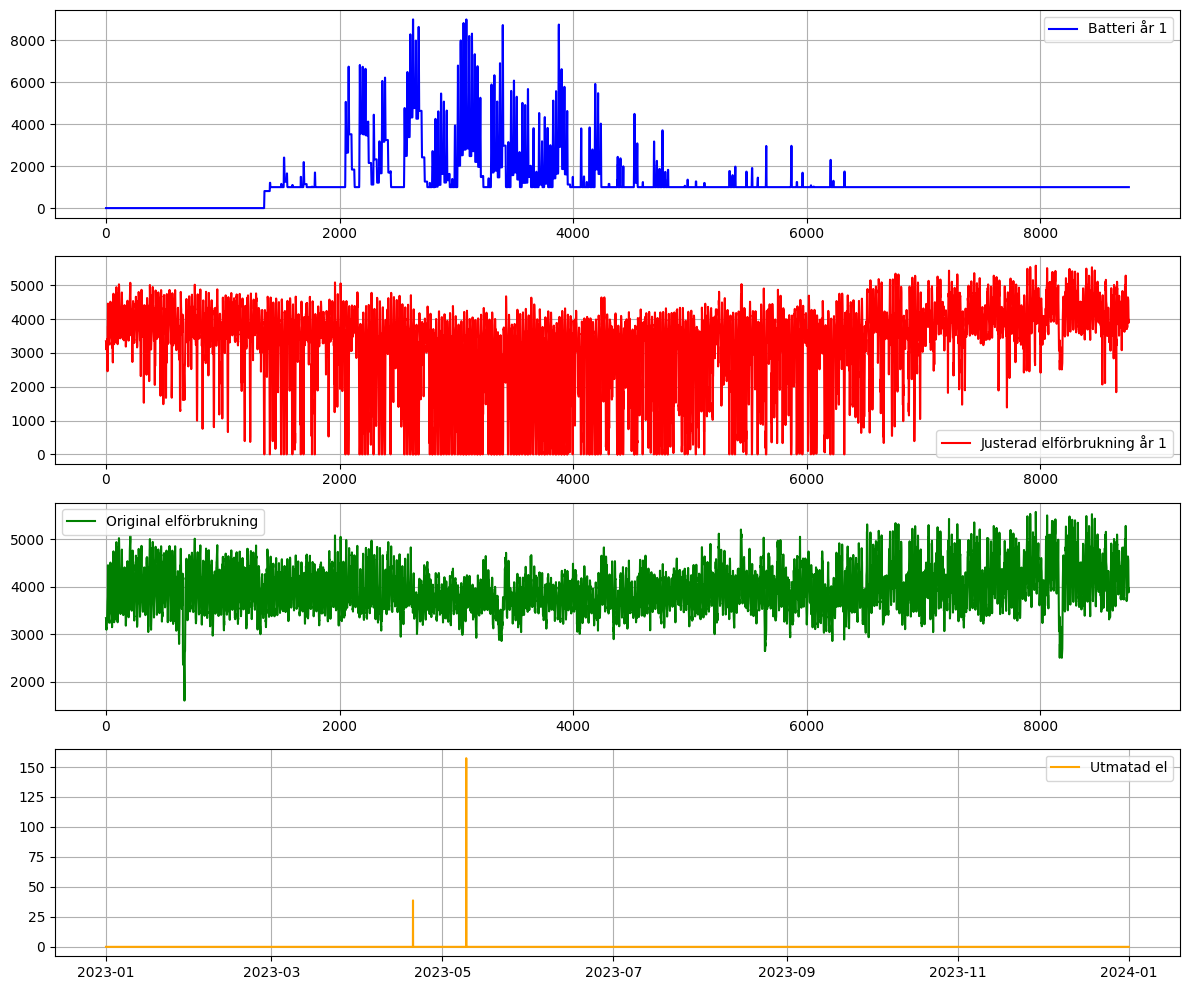

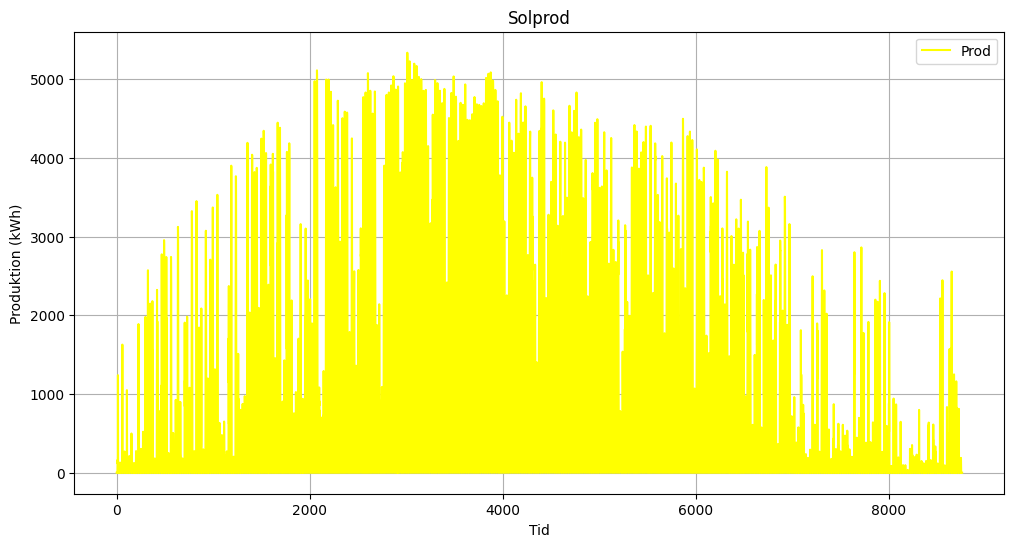

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Läs in Excel-filer
SolprodSödra = pd.read_excel("Soldata-filerSÖDRA/SummaSödraSolPROD.xlsx", header=None)
SödraOmrEL = pd.read_excel("Eldata-filerSÖDRA/SummaSödraOmrådet.xlsx", header=None)

SolprodABK = pd.read_excel("SolprodABK.xlsx", header=None)
ABKEl = pd.read_excel("ABKEL.xlsx", names=["ABKEl"], header=None)
Spotpris = pd.read_excel("Spotpris.xlsx", names=["Spotpris"], header=None)
Vindprod = pd.read_excel("Vindturbin.xlsx", header=None)
StarkaEl = pd.read_excel("Starka2023.xlsx", header=None)
KLTel = pd.read_excel("KLTelFörbr.xlsx", header=None)

NorraEL = StarkaEl.iloc[:, 0] + ABKEl.iloc[:, 0] + KLTel.iloc[:, 0]
SödraEL = SödraOmrEL.iloc[:, 0]
TOTel = NorraEL + SödraEL
Vind = Vindprod.iloc[:, 0]
Sol = 0.69*(SolprodABK.iloc[:, 0] + SolprodSödra.iloc[:, 0])#VIND+SOL=0.46,SOL=0.69
Spot = Spotpris.iloc[:, 0]

Prod = Sol

Prod_list = Prod.tolist()


Spotpris["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(Spotpris), freq="H")
Spotpris.set_index("Tid", inplace=True)

fastNätTOT = 342710

# Lägg till tidsindex för TOTel
TOTel_df = pd.DataFrame({"TOTel": TOTel})
TOTel_df["Tid"] = pd.date_range(start="2023-01-01 00:00", periods=len(TOTel_df), freq="H")
TOTel_df.set_index("Tid", inplace=True)

# Hitta maximal timmedeleffekt per månad
monthly_max_effekt = TOTel_df["TOTel"].resample("M").max()  # Högsta värde per månad

# Effektavgift (per kW)
effektavgift = 57.04  # kr/kW

# Beräkna effektkostnad per månad
effektkostnad_per_månad = monthly_max_effekt * effektavgift  # Kostnad per månad

# Summera effektkostnaden för hela året
total_effektkostnad = effektkostnad_per_månad.sum()

Spotpris["E"] = 2.23 + 0.0583 * Spotpris["Spotpris"]

# Beräkna genomsnittlig överföringsavgift per månad
monthly_avg_E = Spotpris["E"].resample("M").mean()

# Beräkna totala elförbrukningen per månad
monthly_total_TOTel = TOTel_df["TOTel"].resample("M").sum()

# Beräkna summa överföringsavgift för hela året
summaÖverföringsAvgift = (monthly_avg_E * monthly_total_TOTel).sum()

totElnätskostnad = fastNätTOT + total_effektkostnad + summaÖverföringsAvgift/100

elhandelskostnad = (Spot * TOTel).sum() / 100
energiskatt = (43.9 * TOTel).sum() / 100

summaElKostnad = (totElnätskostnad + elhandelskostnad + energiskatt) * 1.25
print("Summa kostnad i el 2023:", summaElKostnad)

# Ta fram elförbrukning (första kolumnen) som en Pandas Series
elförbrukning = pd.Series(TOTel)

# Sortera elförbrukningen i fallande ordning och hämta de 30 högsta värdena
top_30_hours = elförbrukning.sort_values(ascending=False).head(30)

# Skapa en DataFrame med radnummer (index) och värde (elförbrukning)
top_30_with_index = top_30_hours.reset_index()

# Byt namn på kolumnerna för bättre läsbarhet
top_30_with_index.columns = ['Timme', 'Elförbrukning']

# Skriv ut de 30 timmarna med högst elförbrukning och radnummer
print("Original elförbrukning topptimmar: " + top_30_with_index.to_string())
print("Snitt originaltopptimmar: " + str(top_30_hours.mean()))

# ----------------------- YEAR 1 SIMULATION -----------------------
batteriKapacitet = 0.0  # Start with an empty battery
batteriMaxKapacitet = 10000  # Max battery capacity in kWh
min_battery_level = batteriMaxKapacitet*0.1
max_battery_level = batteriMaxKapacitet * 0.9
maxFrånBatteri = max_battery_level*0.5
faktor = 0.1
original_consumption = TOTel.tolist()
justeradElförbrukning = []  # Adjusted electricity consumption for Year 1
battery_values = []  # Battery energy over time
utmatning = []
köptaTimmar = []

for i, (tid, prod, totel, spot) in enumerate(zip(Spotpris.index, Prod, TOTel, Spot)):
    diff = totel - prod  # Difference between consumption and solar production


    if i < 2800:
        faktor = 0.15
    elif  2500 <= i <= 7500:
        faktor = 0.3
    else:
        faktor = 0.07

    if diff <= 0:
        if batteriKapacitet - diff >= max_battery_level:
            utmatEl = batteriKapacitet - diff - max_battery_level
            utmatning.append((tid, utmatEl))
            batteriKapacitet = max_battery_level  # -diff eftersom diff är negativ
        else:
            utmatning.append((tid, 0))
            batteriKapacitet = batteriKapacitet - diff
        # Om solproduktionen är större än förbrukningen, ladda batteriet istället för att spara negativa värden
        justeradElförbrukning.append(0)  # Vi behöver inte köpa el
        köptaTimmar.append((tid,0))
    else:  
        
        if 15 <= tid.hour < 19 and prod == 0:
            energiFrånBatteri = min(batteriKapacitet * faktor, maxFrånBatteri, max(0, batteriKapacitet - min_battery_level))

            batteriKapacitet -= energiFrånBatteri
            köpt_el = max(0, totel - energiFrånBatteri)
            justeradElförbrukning.append(köpt_el)
            köptaTimmar.append((tid, spot if köpt_el > 0 else 0))
            utmatning.append((tid, 0))
        elif 15 <= tid.hour < 19 and prod > 0:
            energiFrånBatteri = min(batteriKapacitet * faktor, diff, maxFrånBatteri, max(0, batteriKapacitet - min_battery_level))

            batteriKapacitet -= energiFrånBatteri
            köpt_el = max(0, diff - energiFrånBatteri)
            justeradElförbrukning.append(köpt_el)
            köptaTimmar.append((tid, spot if köpt_el > 0 else 0))
            utmatning.append((tid, 0))
        elif prod > 0:
            justeradElförbrukning.append(diff)
            köptaTimmar.append((tid, spot))
            utmatning.append((tid,0))
            
        else:
            justeradElförbrukning.append(totel)  
            köptaTimmar.append((tid, spot))
            utmatning.append((tid, 0))

    
    battery_values.append(batteriKapacitet)


# Skapa DataFrame med tidsindex och batterinivå
battery_df = pd.DataFrame({
    "Tid": Spotpris.index[:len(battery_values)],
    "Batteri": battery_values
})
battery_df.set_index("Tid", inplace=True)

# Räkna ut daglig max och min batterinivå
daily_max = battery_df["Batteri"].resample("D").max()
daily_min = battery_df["Batteri"].resample("D").min()

# Räkna ut DoD per dag i procent
daily_DoD = (daily_max - daily_min) / batteriMaxKapacitet * 100

# Räkna ut genomsnittligt dagligt DoD
average_DoD = daily_DoD.mean()

print(f"\nGenomsnittligt dagligt Depth of Discharge (DoD) under året: {average_DoD:.2f}%")

# Konvertera elförbrukning till en NumPy-array
elförbrukning_array = np.array(justeradElförbrukning)

# Hitta de 30 högsta värdena i elförbrukning
top_30_indices = np.argsort(elförbrukning_array)[-30:]  # Index för de 30 största värdena

# Hämta de faktiska tidsstämplarna från Spotpris.index
top_30_times = Spotpris.index[top_30_indices]

# Hämta de 30 största elförbrukningsvärdena
top_30_values = elförbrukning_array[top_30_indices]

# Sortera topp 30 i fallande ordning och behåll index
sorted_pairs = sorted(zip(top_30_values, top_30_times), reverse=True)
values_only = [value for value, _ in sorted_pairs]
mean_value = sum(values_only) / len(values_only)
print(f"Snitt = {mean_value:.2f}")
# Skriv ut de 30 högsta värdena tillsammans med originaltimmarna
print("De 30 högsta elförbrukningsvärdena och deras timmar i Excel-filen:")
for i, (value, original_time) in enumerate(sorted_pairs):
    excel_rad = i + 8  # +8 för rubrikrad och 1-baserade index, och +1 för att börja från 1
    print(f"{i+1}. Timme {original_time}  - Förbrukning: {value} (Excel rad: {excel_rad})")

köptaTimmar_df = pd.DataFrame(köptaTimmar, columns=["Tid", "Spotpris"])
köptaTimmar_df.set_index("Tid", inplace=True)

köptaTimmar_df["E"] = 2.23 + 0.0583 * köptaTimmar_df["Spotpris"]

monthly_avg_E_köpt = köptaTimmar_df["E"].resample("M").mean()

elförbrukning_df = pd.DataFrame({"Tid": Spotpris.index, "elförbrukning": justeradElförbrukning})
elförbrukning_df.set_index("Tid", inplace=True)

monthly_total_elförbrukning = elförbrukning_df["elförbrukning"].resample("M").sum()

monthly_max_effekt_justerad = elförbrukning_df["elförbrukning"].resample("M").max()  # Högsta värde per månad

# Effektavgift (per kW)
effektavgift = 57.04  # kr/kW

# Beräkna effektkostnad per månad
effektkostnad_per_månad_justerad = monthly_max_effekt_justerad * effektavgift  # Kostnad per månad

total_effektkostnad_justerad = effektkostnad_per_månad_justerad.sum()

summaJusteradÖverf = (monthly_avg_E_köpt * monthly_total_elförbrukning).sum()

summaJusteradÖverfKR = (summaJusteradÖverf / 100) + fastNätTOT + total_effektkostnad_justerad

# Filtrera elförbrukning endast för de köpta timmarna
elförbrukning_köpt = elförbrukning_df.loc[köptaTimmar_df.index]

# Beräkna elhandelskostnaden: Spotpris * elförbrukning
elhandelskostnad_köpt = (köptaTimmar_df["Spotpris"] * elförbrukning_köpt["elförbrukning"]).sum() / 100

# Beräkna den justerade energiskatten
total_elförbrukning = sum(justeradElförbrukning)
JusteradEnergiskatt = (total_elförbrukning * 43.9) / 100

# Beräkna den justerade elkostnaden
summaJusteradElkostnad = 1.25 * (summaJusteradÖverfKR + JusteradEnergiskatt + elhandelskostnad_köpt)
print("Justerad elkostnad simulering:", summaJusteradElkostnad)


# ----------------------- PLOTTING RESULTS -----------------------
fig, ax = plt.subplots(4, 1, figsize=(12, 10))

ax[0].plot(battery_values, label='Batteri år 1', color='blue')
ax[1].plot(justeradElförbrukning, label='Justerad elförbrukning år 1', color='red')
ax[2].plot(original_consumption, label='Original elförbrukning', color='green')
utmat_tid, utmat_värde = zip(*utmatning)
ax[3].plot(utmat_tid, utmat_värde, label='Utmatad el', color='orange')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

# Skapa en figur och plotta
plt.figure(figsize=(12, 6))
plt.plot(Prod_list, label="Prod", color="yellow")

plt.xlabel("Tid")
plt.ylabel("Produktion (kWh)")
plt.title("Solprod")
plt.legend()
plt.grid(True)

# Visa grafen
plt.show()
